The Objective is to understand the salary of different job roles and how the salary was changed with year.
Ultimately tried to predict the Salary based on the different working conditions with the help of Regression

# Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from scipy.stats import chi2_contingency
from scipy import stats
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from scipy import stats
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.weightstats import ztest as ztest

# Importing Data

In [2]:
df = pd.read_csv('salaries.csv')
df.shape

(1195, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1195 non-null   int64 
 1   experience_level    1195 non-null   object
 2   employment_type     1195 non-null   object
 3   job_title           1195 non-null   object
 4   salary              1195 non-null   int64 
 5   salary_currency     1195 non-null   object
 6   salary_in_usd       1195 non-null   int64 
 7   employee_residence  1195 non-null   object
 8   remote_ratio        1195 non-null   int64 
 9   company_location    1195 non-null   object
 10  company_size        1195 non-null   object
dtypes: int64(4), object(7)
memory usage: 102.8+ KB


In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [5]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1190,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
1191,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
1192,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
1193,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
1194,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


# Checking for Null Values

In [14]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Checking Unique Values

In [15]:
df.duplicated().value_counts()

False    971
True     224
dtype: int64

# Describing the Data

In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1195.000000,1.195000e+03,1195.000000,1195.000000
mean,2021.684519,2.495210e+05,122041.142259,66.736402
std,0.584604,1.136720e+06,66487.800833,44.035085
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2021.000000,8.000000e+04,73961.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.755500e+05,160237.500000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [8]:
df.describe(include='O')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,1195,1195,1195,1195,1195,1195,1195
unique,4,4,63,18,64,59,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,702,1170,310,892,795,823,774


In [70]:
df.skew()

work_year            -1.226397
experience_level     -0.414139
employment_type      -8.097089
job_title             1.361502
salary_in_usd        -0.002359
employee_residence   -1.110476
remote_ratio         -0.705918
company_location     -1.301344
company_size         -2.220295
dtype: float64

In [71]:
df.kurtosis()

work_year             -0.345012
experience_level      -0.722171
employment_type       64.667366
job_title             13.830819
salary_in_usd          0.579855
employee_residence    -0.282197
remote_ratio          -1.339739
company_location       0.275605
company_size           3.821976
dtype: float64

# Plots

In [12]:
fig = px.bar(df,x="company_size",y="salary_in_usd")
fig.show()

In [11]:
fig = px.bar(df,x="work_year",y="salary_in_usd")
fig.show()

# Checking Correlation with Cramer's V

In [17]:
df = df.apply(
    lambda x : x.astype('category') if x.dtype == 'O' else x
)

cramers_v = am.CramersV(df)

cfit = cramers_v.fit().round(2)
cfit

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
experience_level,1.00,0.13,0.41,0.30,0.41,0.40,0.24
employment_type,0.13,1.00,0.36,0.21,0.46,0.39,0.08
job_title,0.41,0.36,1.00,0.30,0.30,0.30,0.39
salary_currency,0.30,0.21,0.30,1.00,0.87,0.82,0.29
employee_residence,0.41,0.46,0.30,0.87,1.00,0.87,0.45
company_location,0.40,0.39,0.30,0.82,0.87,1.00,0.41
company_size,0.24,0.08,0.39,0.29,0.45,0.41,1.00


## Dropping two Columns as they are co

In [19]:
df.drop(['salary','salary_currency'],axis=1,inplace=True)

# Statistical Analysis

In [20]:
salary_DS = df.loc[df['job_title']=='Data Scientist','salary_in_usd']
salary_DA = df.loc[df['job_title']=='Data Analyst','salary_in_usd']
salary_DE = df.loc[df['job_title']=='Data Engineer','salary_in_usd']
salary_BI = df.loc[df['job_title']=='Power BI Developer','salary_in_usd']

## ANNOVA

### Null Hypothesis - The mean of Salaries of DataScience, Data Analyst, Data Engineer, BI Developer doesn't have significant differences
### Alternate Hypothesis - The mean of Salaries of DataScience, Data Analyst, Data Engineer, BI Developer have significant differences

In [21]:
f_oneway(salary_DS, salary_DA, salary_DE, salary_BI)

F_onewayResult(statistic=14.393293242812549, pvalue=4.006441819265575e-09)

## Chi-Square Test to check the Independence of Employee Residence and Company Location

### Null Hypothesis - Employee Residence and Company Location are independent of each other
### Alternate Hypothesis - Employee Residence and Company Location are dependent of each other

In [23]:
crosstab = pd.crosstab(df['employee_residence'],df['company_location'])
chi, p, dof, expected = chi2_contingency(crosstab)
alpha = 0.05
if (p<alpha):
    print('There is no support for Null Hypothesis')
else:
    print('Null Hypothesis has full support')

There is no support for Null Hypothesis


## Z - test to check if the salary is greater in 2022 or 2020 and 2021

### Null Hypothesis - Mean Salary in 2022 is less or equal to salary in 2021 and 2020
### Alternate Hypothesis - Mean Salary in 2022 is greater than salary in 2021 and 2020

In [26]:
salary_2020_2021 = df.loc[df['work_year'] != 2022,'salary_in_usd']
salary_2022 = df.loc[df['work_year'] == 2022,'salary_in_usd']
sal_2020_2021_mean = salary_2020_2021.mean()
sal_2022 = salary_2022.mean()
var_2020_2021 = np.std(salary_2020_2021)
var_2022 = np.std(salary_2022)

In [27]:
ztest(salary_2020_2021,salary_2022,value=0)

(-7.911272296290446, 2.5477158932407347e-15)

### There is no support for the Null Hypothesis

# Giving weights to Categorical values

In [30]:
for i in df.columns:
    a = df.groupby(i).salary_in_usd.agg('mean')/1000
    a = a.round()
#    for j in a.iteritems():
#        if j ==0:
    print(a)

work_year
2020     93.0
2021     98.0
2022    131.0
Name: salary_in_usd, dtype: float64
experience_level
EN     58.0
EX    196.0
MI     90.0
SE    144.0
Name: salary_in_usd, dtype: float64
employment_type
CT    135.0
FL     45.0
FT    123.0
PT     38.0
Name: salary_in_usd, dtype: float64
job_title
3D Computer Vision Researcher           4.0
AI Scientist                           79.0
Analytics Engineer                    140.0
Applied Data Scientist                155.0
Applied Machine Learning Scientist    115.0
                                      ...  
Principal Data Scientist              214.0
Product Data Analyst                   55.0
Product Data Scientist                  8.0
Research Scientist                    109.0
Staff Data Scientist                  105.0
Name: salary_in_usd, Length: 63, dtype: float64
salary_in_usd
2324        2.0
2429        2.0
2859        3.0
3088        3.0
4000        4.0
          ...  
412000    412.0
416000    416.0
423000    423.0
450000    4

In [31]:
for i in df.columns:
    if (((df[i].dtype)!='int64')):
        work_year_mean = df.groupby(i).salary_in_usd.agg('mean')/1000
        work_year_round = round(work_year_mean)
        work_year1 = work_year_round.to_dict()
        df = df.replace({i: work_year1})


In [32]:
work_year_mean = df.groupby('work_year').salary_in_usd.agg('mean')/10000
work_year_round = round(work_year_mean)
work_year1 = work_year_round.to_dict()
df = df.replace({'work_year': work_year1})
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,13.0,144.0,123.0,144.0,200000,84.0,100,84.0,80.0
1,13.0,58.0,123.0,126.0,74378,104.0,100,106.0,118.0
2,13.0,144.0,123.0,165.0,165000,149.0,50,147.0,80.0
3,13.0,58.0,123.0,126.0,33599,84.0,50,84.0,118.0
4,13.0,144.0,123.0,125.0,185900,149.0,0,147.0,130.0


# Checking Correlation

In [33]:
df.corr(method='spearman')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.333698,0.076244,0.036221,0.288205,0.381358,0.020755,0.336966,0.511572
experience_level,0.333698,1.000000,0.109074,0.248309,0.563614,0.465091,0.066687,0.459399,0.280499
employment_type,0.076244,0.109074,1.000000,0.038241,0.114643,0.129530,0.030935,0.097303,0.044058
job_title,0.036221,0.248309,0.038241,1.000000,0.371412,0.189594,0.011405,0.165258,-0.004454
salary_in_usd,0.288205,0.563614,0.114643,0.371412,1.000000,0.673455,0.072698,0.643835,0.225192
employee_residence,0.381358,0.465091,0.129530,0.189594,0.673455,1.000000,0.094319,0.918828,0.311204
remote_ratio,0.020755,0.066687,0.030935,0.011405,0.072698,0.094319,1.000000,0.117241,-0.019964
company_location,0.336966,0.459399,0.097303,0.165258,0.643835,0.918828,0.117241,1.000000,0.276593
company_size,0.511572,0.280499,0.044058,-0.004454,0.225192,0.311204,-0.019964,0.276593,1.000000


<AxesSubplot:>

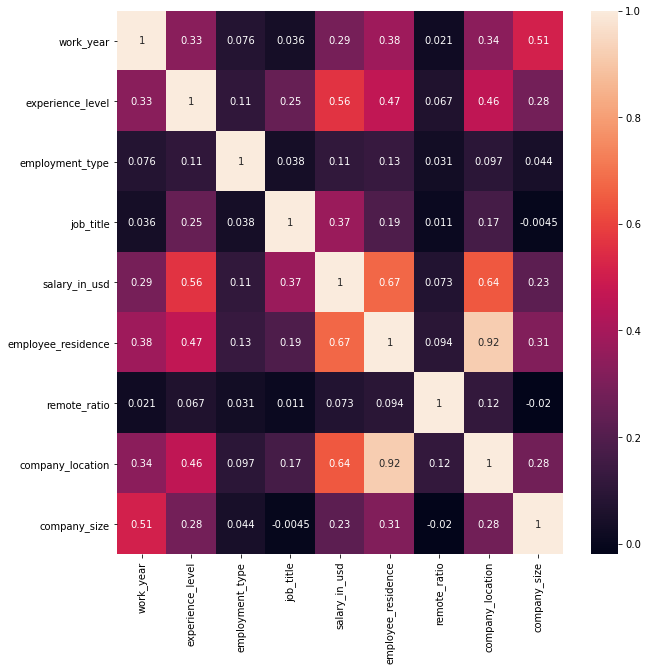

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='spearman'),annot=True)

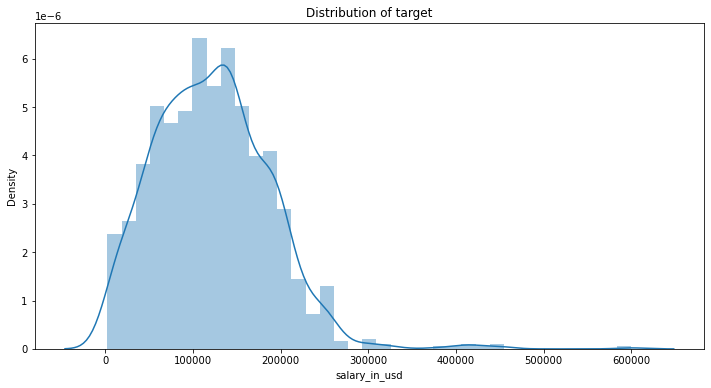

In [36]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of target')
sns.distplot(df['salary_in_usd'])
plt.show()

# Modelling

## OLS

In [37]:
b,a = dmatrices('salary_in_usd ~ work_year + experience_level + employment_type + job_title + employee_residence + remote_ratio + company_location + company_size',data=df,return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['variable'] = a.columns

vif

,VIF,variable
0,256.573371,Intercept
1,1.384366,work_year
2,1.392169,experience_level
3,1.047922,employment_type
4,1.111966,job_title
5,6.636635,employee_residence
6,1.012194,remote_ratio
7,6.247913,company_location
8,1.276278,company_size


In [38]:
mod = sm.OLS(b,a)
fii = mod.fit()
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     175.3
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          5.74e-195
Time:                        01:28:13   Log-Likelihood:                -14499.
No. Observations:                1195   AIC:                         2.902e+04
Df Residuals:                    1186   BIC:                         2.906e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -9.829e+04   2.09e+04     -4.697      0.000   -1.39e+05   -5.72e+04
work_year          -2572.1213   1076.144     -2.390      0.017   -4683.480    -460.762
experience_level     467.7621     44.234     10.575      0.000     380.977     554.548
employment_type      128.0574    135.246      0.947      0.344    -137.291     393.406
job_title            606.3631     46.450     13.054      0.000     515.229     697.497
employee_residence   521.9671     80.856      6.456      0.000     363.330     680.604
remote_ratio         -16.9513     29.858     -0.568      0.570     -75.532      41.630
company_location     251.3606     80.818      3.110      0.002      92.799     409.922
company_size          96.9243    101.985      0.950      0.342    -103.167     297.015
==============================================================================
Omnibus:                      405.685   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2889.222
Skew:                           1.381   Prob(JB):                         0.00
Kurtosis:                      10.099   Cond. No.                     4.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

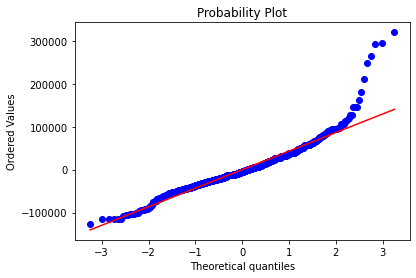

In [39]:
stats.probplot(fii.resid, dist="norm", plot=plt)
plt.show()

In [41]:
df['salary_in_usd'] = stats.boxcox(df['salary_in_usd'])[0]

In [42]:
df['salary_in_usd'].skew()

-0.002359287122995231

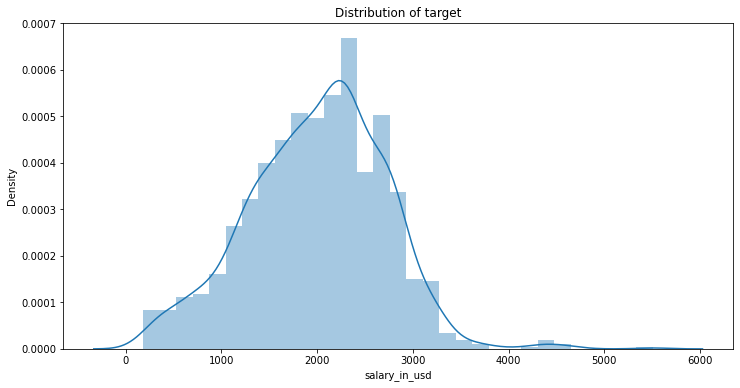

In [43]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of target')
sns.distplot(df['salary_in_usd'])
plt.show()

In [45]:
d,c = dmatrices('salary_in_usd ~ work_year + experience_level + employment_type + job_title + employee_residence + remote_ratio + company_location + company_size',data=df,return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['variable'] = c.columns

vif

,VIF,variable
0,256.573371,Intercept
1,1.384366,work_year
2,1.392169,experience_level
3,1.047922,employment_type
4,1.111966,job_title
5,6.636635,employee_residence
6,1.012194,remote_ratio
7,6.247913,company_location
8,1.276278,company_size


In [46]:
mod = sm.OLS(d,c)
fii = mod.fit()
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     242.6
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          1.87e-243
Time:                        01:29:52   Log-Likelihood:                -8965.1
No. Observations:                1195   AIC:                         1.795e+04
Df Residuals:                    1186   BIC:                         1.799e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -680.0995    203.926     -3.335      0.001   -1080.195    -280.004
work_year            -19.0384     10.488     -1.815      0.070     -39.615       1.538
experience_level       4.9884      0.431     11.572      0.000       4.143       5.834
employment_type        2.4533      1.318      1.861      0.063      -0.133       5.039
job_title              5.9322      0.453     13.104      0.000       5.044       6.820
employee_residence     6.0437      0.788      7.670      0.000       4.498       7.590
remote_ratio          -0.1564      0.291     -0.537      0.591      -0.727       0.415
company_location       3.4009      0.788      4.318      0.000       1.856       4.946
company_size           1.1503      0.994      1.157      0.247      -0.800       3.100
==============================================================================
Omnibus:                      115.048   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.242
Skew:                           0.432   Prob(JB):                     3.33e-87
Kurtosis:                       5.693   Cond. No.                     4.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

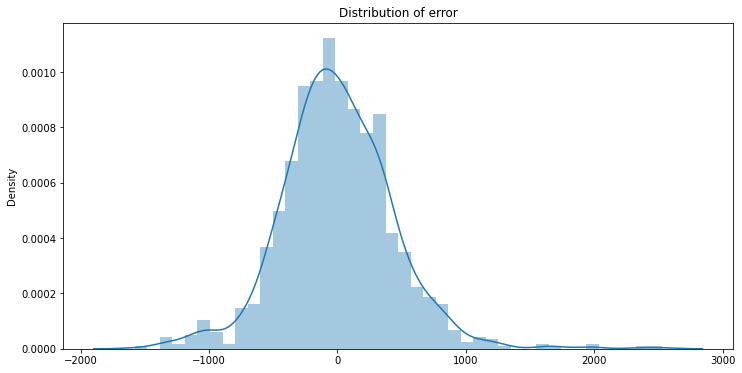

In [47]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(fii.resid)
plt.show()

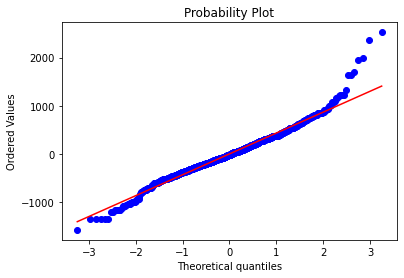

In [48]:
stats.probplot(fii.resid, dist="norm", plot=plt)
plt.show()

In [49]:
df1 = df.copy()

In [50]:
sc = StandardScaler()

In [54]:
df1 = pd.DataFrame(sc.fit_transform(df1),columns=df1.columns)

In [55]:
f,e = dmatrices('salary_in_usd ~ experience_level + employment_type + job_title + employee_residence + company_location',data=df1,return_type='dataframe')

In [56]:
mod = sm.OLS(f,e)
fii = mod.fit()
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     387.0
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          2.00e-246
Time:                        01:31:27   Log-Likelihood:                -1118.4
No. Observations:                1195   AIC:                             2249.
Df Residuals:                    1189   BIC:                             2279.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.794e-16      0.018  -1.56e-14      1.000      -0.035       0.035
experience_level       0.2395      0.021     11.625      0.000       0.199       0.280
employment_type        0.0335      0.018      1.829      0.068      -0.002       0.069
job_title              0.2496      0.019     13.304      0.000       0.213       0.286
employee_residence     0.3482      0.045      7.759      0.000       0.260       0.436
company_location       0.1917      0.044      4.315      0.000       0.105       0.279
==============================================================================
Omnibus:                      123.829   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.157
Skew:                           0.453   Prob(JB):                     1.46e-99
Kurtosis:                       5.884   Cond. No.                         5.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
fii.resid.skew()

0.45390508597176055

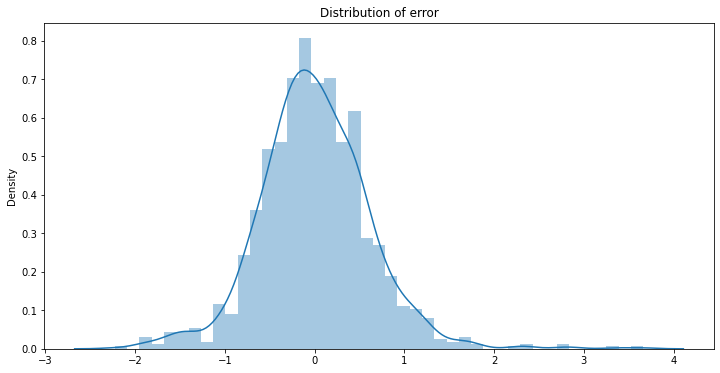

In [58]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(fii.resid)
plt.show()

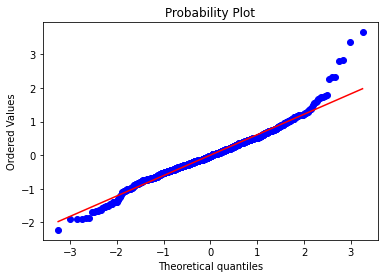

In [59]:
stats.probplot(fii.resid, dist="norm", plot=plt)
plt.show()

In [60]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result = sms.het_breuschpagan(fii.resid, fii.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 31.720596406945923),
 ('p-value', 6.748137151281407e-06),
 ('f-value', 6.484390424409624),
 ('f p-value', 5.865817436014318e-06)]

In [63]:
features = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location']

In [64]:
X = df[features]
y = df['salary_in_usd']

## Train Test Split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Linear Regression

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(X_train,y_train)

LinearRegression()

In [68]:
metrics.r2_score(y_train,lr.predict(X_train))

0.6029727541321226

In [69]:
metrics.r2_score(y_test,lr.predict(X_test))

0.6654041003862836